# Grafos
- De componen de un conjunto G(V, E) donde V son los vértices y E aristas.
  
- Conjunto de nodos -> (a, b, c)
  
- El conjunto de aristas se vería como ((a,b ), (a, c))
### Propiedades de las aristas:

- 
No solo los nodos almacenan información ya que también lo hacen las aristas. Estas pueden tener un id y como propiedad pueden tener un peso

- Lo mas comun es encontrar peso, costo (¿cuanto cuesta en llegar de A a B?)


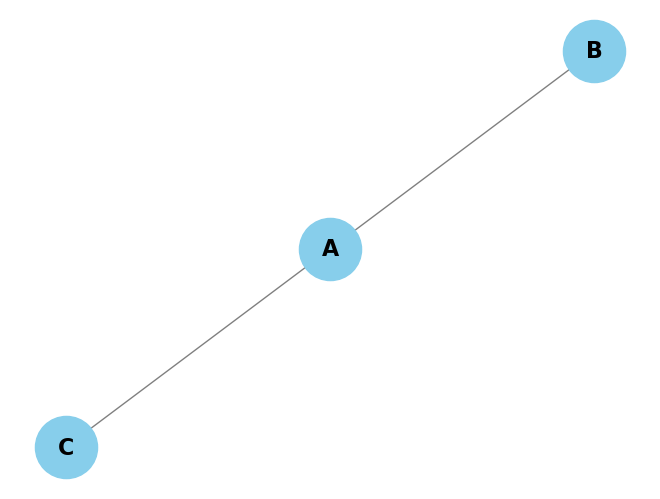

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos
G.add_nodes_from(['A', 'B', 'C'])

# Añadir aristas
G.add_edges_from([('A', 'B'), ('A', 'C')])

# Dibujar el grafo
pos = nx.spring_layout(G)  # Posición de los nodos
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=16, font_weight='bold', edge_color='gray')

# Mostrar el grafo
plt.show()

### Ruta o camino

Es un camino entre un par de nodos consecutivos y unidos por una arista

Ej:

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos
# G.add_edges_from(['A', 'B', 'C', 'D','E'])

# Añadir aristas
G.add_edges_from([('A', 'B'), ('A', 'C'), ('C', 'D'), ('D', 'E')])

# Dibujar el grafo
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")   # Posición de los nodos
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)

# Mostrar el grafo
plt.show()


ImportError: requires pygraphviz http://pygraphviz.github.io/

En este arbol la ruta es a-c-d, para llegar a D.
         
En en grafo sin pesos se dan saltos.

### Grafo dirigido

Es un grafo que tiene direccion en sus aristas.

En el conjunto se tiene fuente y destino, siendo importante el orden de los nodos en las aristas -> ((1,2), (1,3)). El primer nodo es source y el segundo es targe

-> NetworkX: ayuda a desplejar el grafo de forma visual

Ej:
En las redes sociales, el folowing, es un grafo dirigido porque puede que la otra persona te siga o no.

### Grafo no dirigido 

Sus aristas son reciprocas, apuntan al mismo lado.

El orden de los nodos no importa en las aristas. Pero en codigo se debe especificar ((A, B),(B, A))

### Conceptos

- Path:

Se dice una ruta o path es simple cuando los nodos no se repiten en el path

- Un ciclo simple en el path:

Se necesitan dos o mas nodos. Siendo el nodo de inicio del path el mismo al nodo final.

Ej; Se inicia con un nodo X y luego de recorrer otros nodos se termina en el mismo nodo X.

- Un ciclo no simple en el path:

Se inicia en un nodo, se recorre otros nodos que igual se repiten y se termina en el nodo inicial 

- grado:

Si el grafo es no dirigido entonces para cada uno de los nodos se puede extraer el grado fijandose en el numero de conexiones maxima que tiene cada nodo.

Si el grafo es dirigido  entonces se puede extraer el grado del grafo viendo el numero de conexiones validas de cada nodo

En grafos digidos se tiene

- grado de entrada: que son las flechas/direccioes que entran al nodo 

- grado de salida

En grafos dirigidos el grado del grafo es la suma del grado de entrada y de salida.

En grafos no dirigodos con pesos, el grado del grafo sera la suma de sus pesos.

- El grado de entrada del grafo con pesos y dirigido 

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Definimos el árbol usando un diccionario
# Ejemplo de árbol:
#       A
#      / \
#     B   C
#    / \   \
#   D   E   F

tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

# Función para agregar nodos y aristas al grafo
def add_edges(tree, graph, parent=None):
    for node, children in tree.items():
        for child in children:
            graph.add_edge(node, child)
        add_edges({child: tree[child] for child in children}, graph)

# Crear el grafo
G = nx.DiGraph()  # Grafo dirigido
add_edges(tree, G)

# Posiciones de los nodos para que la raíz esté en la parte superior
pos = nx.multipartite_layout(G, subset_key=lambda n: n[0])  # Usa el primer carácter como clave

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Árbol Representado como Grafo')
plt.show()


KeyError: 'D'

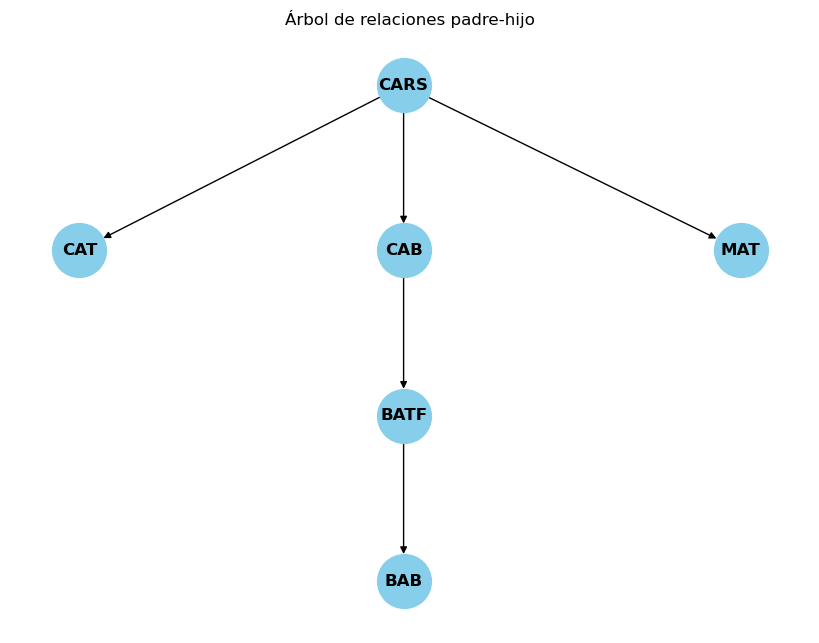

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Supongamos que esta es la estructura que genera tu función bfs_tree
# generate_tree = bfs_tree("CARS", "BATF")  
# Ejemplo simulado:
generate_tree = {
    'CAT': 'CARS',
    'CAB': 'CARS',
    'MAT': 'CARS',
    'BATF': 'CAB',
    'BAB': 'BATF'
}

#primera_clave = next(iter(generate_tree))  # Obtener la primera clave
#generate_tree.pop(primera_clave)  # Eliminar la primera clave

G = nx.DiGraph()

# Agregar los nodos
G.add_nodes_from(['CARS', 'CAT', 'CAB', 'MAT', 'BATF', 'BAB'])

# Agregar las relaciones al grafo
for hijo, padre in generate_tree.items():
    G.add_edge(padre, hijo)

# Dibujar el grafo con un layout jerárquico
plt.figure(figsize=(8, 6))
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')  # Layout jerárquico usando graphviz
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)
plt.title("Árbol de relaciones padre-hijo")
plt.show()

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
generate_tree = bfs_tree("CARS", "BATF")


primera_clave = next(iter(generate_tree))  # Obtener la primera clave
generate_tree.pop(primera_clave)  # Eliminar la primera clave

#print(generate_tree)

G = nx.DiGraph()

G.add_nodes_from(['CARS', 'CAT', 'CAB', 'MAT', 'BATF', 'BAB'])

# Agregar las relaciones al grafo
for hijo, padre in generate_tree.items():
    G.add_edge(padre, hijo)

# Dibujar el grafo con un layout jerárquico
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Puedes probar con layouts como 'spring_layout' o 'shell_layout'
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)
plt.title("Árbol de relaciones padre-hijo")
plt.show()

NameError: name 'bfs_tree' is not defined